# Graduate Admission Prediction

In this analysis, we will try to predict the chance of admission into a particular university based on the student's profile.

## Importing Libraries

In [1]:
#import modules
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix


# Loading Data

In [2]:
#read data
grad_df=pd.read_csv('Admission_Predict_Ver1.1.csv')

In [3]:
#check first 5 rows
grad_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Data Cleaning

Let's check for missing values

In [4]:
#check for null values
print(grad_df.isnull().sum())

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [5]:
#check basic info
grad_df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Lets check for outliers

In [6]:
#plot boxplots to check for outliers
numeric_columns = grad_df.select_dtypes(include=['number']).columns

def outliers_boxplots(df, columns=numeric_columns, title="Outliers", color= "magenta"):
    fig = make_subplots(rows=1, cols=len(columns))
    for i, column in enumerate(columns):
        trace = go.Box(y=df[column],name=f'{column}',marker=dict(color=color))
        fig.add_trace(trace, row=1, col=i+1)
    fig.update_layout(title_text=title, title_x=0.5)
    fig.show()

outliers_boxplots(grad_df, numeric_columns)

From the plot, there seems to be no outliers in the data and we can proceed with the analysis.

# Data Processing

## Correlation Matrix

Let's check the correlation between the variables

In [7]:
# lets select the columns which we'll use
columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit']

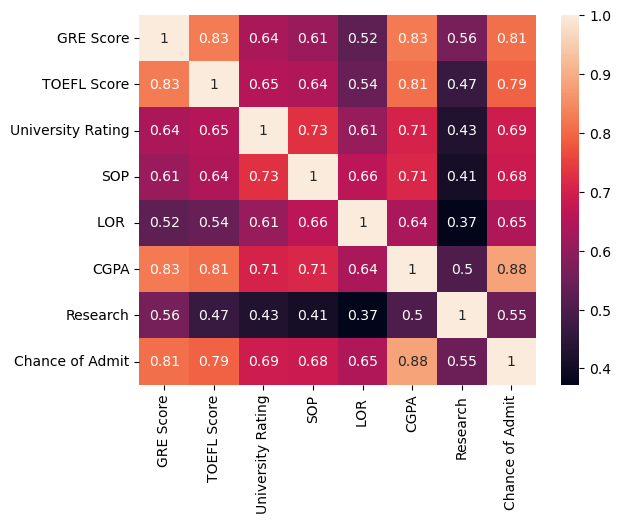

In [8]:
#correlation
corr = grad_df[columns].corr()
sns.heatmap(corr, annot=True)
plt.show()

We can see that the chance of admission is highly correlated with CGPA, GRE and TOEFEL scores. 

## Pairplot

Let's plot a pairplot to see the relationship between the variables

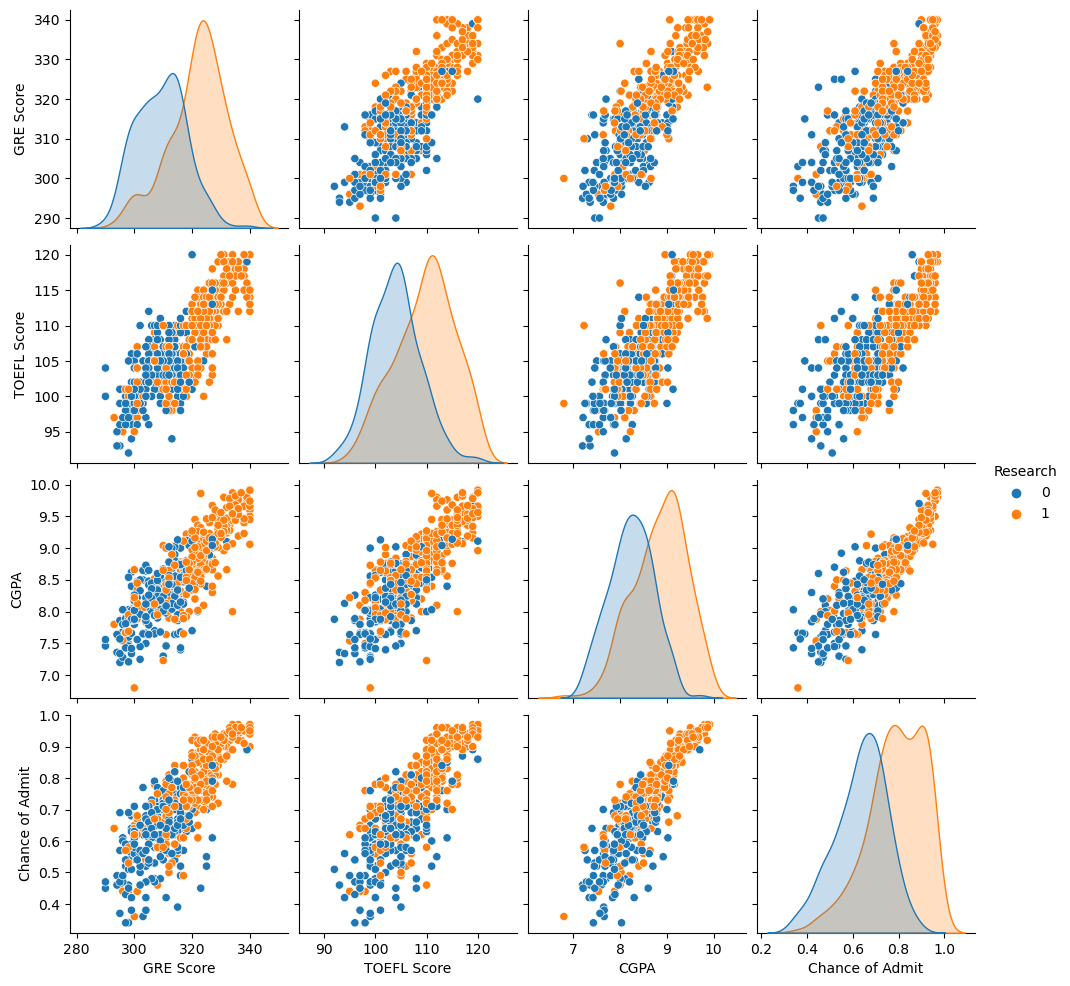

In [9]:
#view data using pairplot
sns.pairplot(grad_df, vars=['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit', ], hue='Research')

From the above plot, students how carry out research get higher scores in GRE, TOEFEL and CGPA which increases their chances of admission.

# Data Preprocessing

## Selecting Cut-off for Chance of Admission

Let's create a new column called Admitted which will have a value of 1 if the chance of admission is greater than 0.7 and 0 otherwise.

In [10]:
#create a new column if the student has a chance of admission greater than 0.6
grad_df['Admission Status'] = np.where(grad_df['Chance of Admit']>=0.6, "Admitted", "Rejected")

#check the number of students who were admitted
grad_df['Admission Status'].value_counts()


Admission Status
Admitted    405
Rejected     95
Name: count, dtype: int64

In [11]:
grad_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admission Status
0,1,337,118,4,4.5,4.5,9.65,1,0.92,Admitted
1,2,324,107,4,4.0,4.5,8.87,1,0.76,Admitted
2,3,316,104,3,3.0,3.5,8.00,1,0.72,Admitted
3,4,322,110,3,3.5,2.5,8.67,1,0.80,Admitted
4,5,314,103,2,2.0,3.0,8.21,0,0.65,Admitted


## Splitting the Data

Let's split the data into attributes and labels

In [12]:
#split data into attributes and labels
X = grad_df[['GRE Score', 'TOEFL Score', 'CGPA']]
y = grad_df['Admission Status']

In [13]:
X

,GRE Score,TOEFL Score,CGPA
0,337,118,9.65
1,324,107,8.87
2,316,104,8.00
3,322,110,8.67
4,314,103,8.21
...,...,...,...
495,332,108,9.02
496,337,117,9.87
497,330,120,9.56
498,312,103,8.43


## Train Test Split

To avoid over-fitting, we will divide our dataset into training and test splits, which gives us a better idea as to how our algorithm performed during the testing phase.

In [14]:
#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Feature Scaling

Before making any actual predictions, it is always a good practice to scale the features so that all of them can be normalized to the same scale.

In [15]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[ 0.19560165, -0.38221009,  0.12324575],
       [-1.39393773, -0.21710854, -0.20420891],
       [-0.24593706, -0.38221009, -0.48254537],
       ...,
       [-0.95239901, -0.71241319, -0.62989997],
       [ 0.99037134,  1.26880541,  0.92550966],
       [ 1.16698683,  1.43390696,  1.25296432]])

# Training and Predictions

We will use the KNN algorithm to train our model and make predictions. After several iterations, we found that the best value of k is 7.

In [16]:
#train the model
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [17]:
#make predictions
y_pred = classifier.predict(X_test)
y_pred

array(['Admitted', 'Admitted', 'Admitted', 'Admitted', 'Rejected',
       'Admitted', 'Admitted', 'Admitted', 'Admitted', 'Rejected',
       'Admitted', 'Rejected', 'Admitted', 'Admitted', 'Admitted',
       'Admitted', 'Admitted', 'Admitted', 'Admitted', 'Admitted',
       'Admitted', 'Admitted', 'Admitted', 'Admitted', 'Admitted',
       'Admitted', 'Admitted', 'Admitted', 'Admitted', 'Admitted',
       'Rejected', 'Admitted', 'Admitted', 'Admitted', 'Admitted',
       'Admitted', 'Admitted', 'Admitted', 'Admitted', 'Admitted',
       'Admitted', 'Admitted', 'Admitted', 'Admitted', 'Admitted',
       'Admitted', 'Rejected', 'Admitted', 'Admitted', 'Rejected',
       'Admitted', 'Admitted', 'Admitted', 'Rejected', 'Admitted',
       'Admitted', 'Admitted', 'Admitted', 'Rejected', 'Admitted',
       'Admitted', 'Admitted', 'Admitted', 'Admitted', 'Admitted',
       'Rejected', 'Admitted', 'Rejected', 'Rejected', 'Rejected',
       'Admitted', 'Admitted', 'Admitted', 'Admitted', 'Admitt

score the model

In [18]:
classifier.score(X_test, y_test)

0.92

## Evaluating the Algorithm

In [19]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[79  4]
 [ 4 13]]
              precision    recall  f1-score   support

    Admitted       0.95      0.95      0.95        83
    Rejected       0.76      0.76      0.76        17

    accuracy                           0.92       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.92      0.92      0.92       100



# Conclusion

The model has an accuracy of 92% which is good. We can use this model to predict the chance of admission of a student into a university.